In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
df=pd.read_csv(r"C:\Users\Tirupathi\Desktop\sal_pred_project\Salary_Data.csv")

In [12]:
#lets start our project

In [13]:
df.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


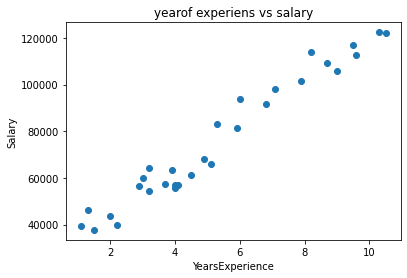

In [83]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.title("yearof experiens vs salary")
plt.xlabel('YearsExperience')
plt.ylabel("Salary")
plt.savefig(r'\Users\Tirupathi\Desktop\sal_pred_project\Year of Experience.jpg')
plt.show()

In [78]:
X = df.iloc[:,:-1].values
y =df.iloc[:,-1].values

In [80]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=101)

In [19]:
X_train

array([[ 3.9],
       [ 2. ],
       [ 1.3],
       [ 6. ],
       [ 7.9],
       [ 4. ],
       [ 2.9],
       [ 4.5],
       [ 1.1],
       [ 7.1],
       [ 2.2],
       [ 3.2],
       [ 4.1],
       [ 3.7],
       [ 4.9],
       [10.5],
       [ 8.2],
       [ 3. ],
       [ 5.3],
       [ 4. ]])

In [20]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [21]:
y_train

array([ 63218,  43525,  46205,  93940, 101302,  56957,  56642,  61111,
        39343,  98273,  39891,  64445,  57081,  57189,  67938, 121872,
       113812,  60150,  83088,  55794], dtype=int64)

In [22]:
y_test

array([ 91738, 109431,  54445,  81363,  37731, 112635, 116969,  66029,
       105582, 122391], dtype=int64)

In [36]:
#linear regression
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [37]:
LR.fit(X_train,y_train)

LinearRegression()

In [38]:
 y_pred_LR=LR.predict(X_test)

In [39]:
X_test

array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [40]:
y_test

array([ 91738, 109431,  54445,  81363,  37731, 112635, 116969,  66029,
       105582, 122391], dtype=int64)

In [41]:
y_pred_LR

array([ 91477.92796603, 109893.22802466,  56585.7804865 ,  82754.89109615,
        40108.93306562, 118616.26489454, 117647.03857567,  75001.08054514,
       112800.90698129, 125400.84912667])

In [42]:
diff_LR=y_test-y_pred_LR

In [43]:
res_df=pd.concat([pd.Series(y_pred_LR),pd.Series(y_test),pd.Series(diff_LR)],axis=1)
res_df.columns=['Prediction','Original Data','Diff']


In [44]:
res_df


,Prediction,Original Data,Diff
0,91477.927966,91738,260.072034
1,109893.228025,109431,-462.228025
2,56585.780487,54445,-2140.780487
3,82754.891096,81363,-1391.891096
4,40108.933066,37731,-2377.933066
5,118616.264895,112635,-5981.264895
6,117647.038576,116969,-678.038576
7,75001.080545,66029,-8972.080545
8,112800.906981,105582,-7218.906981
9,125400.849127,122391,-3009.849127


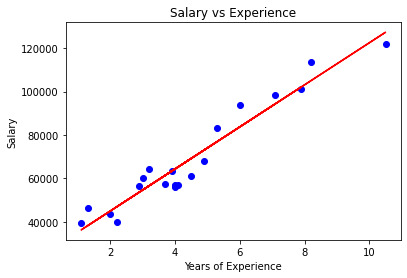

In [45]:
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.savefig(r'\Users\Tirupathi\Desktop\sal_pred_project\YearExperience.jpg')
plt.show()


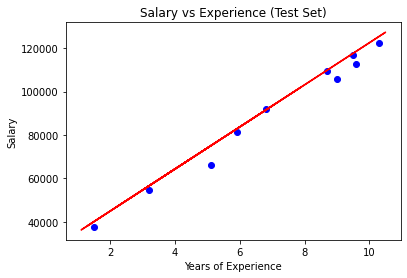

In [46]:
plt.scatter(X_test,y_test,color='blue')
plt.plot(X_train,LR.predict(X_train),color='red')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.show()


In [ ]:
##Metrics

In [47]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
R2=metrics.r2_score(y_test,y_pred_LR)


In [48]:
rmse


4363.043260343273

In [49]:
R2


0.974811112371526

In [50]:
LR.predict([[3]])


array([54647.32784875])

In [51]:
#Decision Tree Regressor


In [52]:
from sklearn.tree import DecisionTreeRegressor


In [53]:
DT=DecisionTreeRegressor()


In [54]:
DT.fit(X_train,y_train)


DecisionTreeRegressor()

In [55]:
y_pred_dt=DT.predict(X_test)


In [56]:
y_pred_dt


array([ 98273., 113812.,  64445.,  93940.,  46205., 121872., 121872.,
        67938., 113812., 121872.])

In [57]:
y_test


array([ 91738, 109431,  54445,  81363,  37731, 112635, 116969,  66029,
       105582, 122391], dtype=int64)

In [59]:
diff_DT=y_test-y_pred_dt

In [60]:
res_dt=pd.concat([pd.Series(y_pred_dt),pd.Series(y_test),pd.Series(diff_DT)],axis=1)
res_dt.columns=['Prediction','Original Data','Diff']


In [61]:
res_dt

,Prediction,Original Data,Diff
0,98273.0,91738,-6535.0
1,113812.0,109431,-4381.0
2,64445.0,54445,-10000.0
3,93940.0,81363,-12577.0
4,46205.0,37731,-8474.0
5,121872.0,112635,-9237.0
6,121872.0,116969,-4903.0
7,67938.0,66029,-1909.0
8,113812.0,105582,-8230.0
9,121872.0,122391,519.0


In [62]:
X_test


array([[ 6.8],
       [ 8.7],
       [ 3.2],
       [ 5.9],
       [ 1.5],
       [ 9.6],
       [ 9.5],
       [ 5.1],
       [ 9. ],
       [10.3]])

In [63]:
from sklearn import metrics
rmse= np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt))
R2=metrics.r2_score(y_test,y_pred_dt)


In [64]:
rmse


7568.996703658947

In [65]:
R2


0.9241934760377903

In [66]:
from sklearn import tree


In [68]:
text_representation=tree.export_text(DT)
print(text_representation)


|--- feature_0 <= 5.10
|   |--- feature_0 <= 2.55
|   |   |--- feature_0 <= 1.20
|   |   |   |--- value: [39343.00]
|   |   |--- feature_0 >  1.20
|   |   |   |--- feature_0 <= 2.10
|   |   |   |   |--- feature_0 <= 1.65
|   |   |   |   |   |--- value: [46205.00]
|   |   |   |   |--- feature_0 >  1.65
|   |   |   |   |   |--- value: [43525.00]
|   |   |   |--- feature_0 >  2.10
|   |   |   |   |--- value: [39891.00]
|   |--- feature_0 >  2.55
|   |   |--- feature_0 <= 4.70
|   |   |   |--- feature_0 <= 3.95
|   |   |   |   |--- feature_0 <= 2.95
|   |   |   |   |   |--- value: [56642.00]
|   |   |   |   |--- feature_0 >  2.95
|   |   |   |   |   |--- feature_0 <= 3.80
|   |   |   |   |   |   |--- feature_0 <= 3.45
|   |   |   |   |   |   |   |--- feature_0 <= 3.10
|   |   |   |   |   |   |   |   |--- value: [60150.00]
|   |   |   |   |   |   |   |--- feature_0 >  3.10
|   |   |   |   |   |   |   |   |--- value: [64445.00]
|   |   |   |   |   |   |--- feature_0 >  3.45
|   |   |   |   |

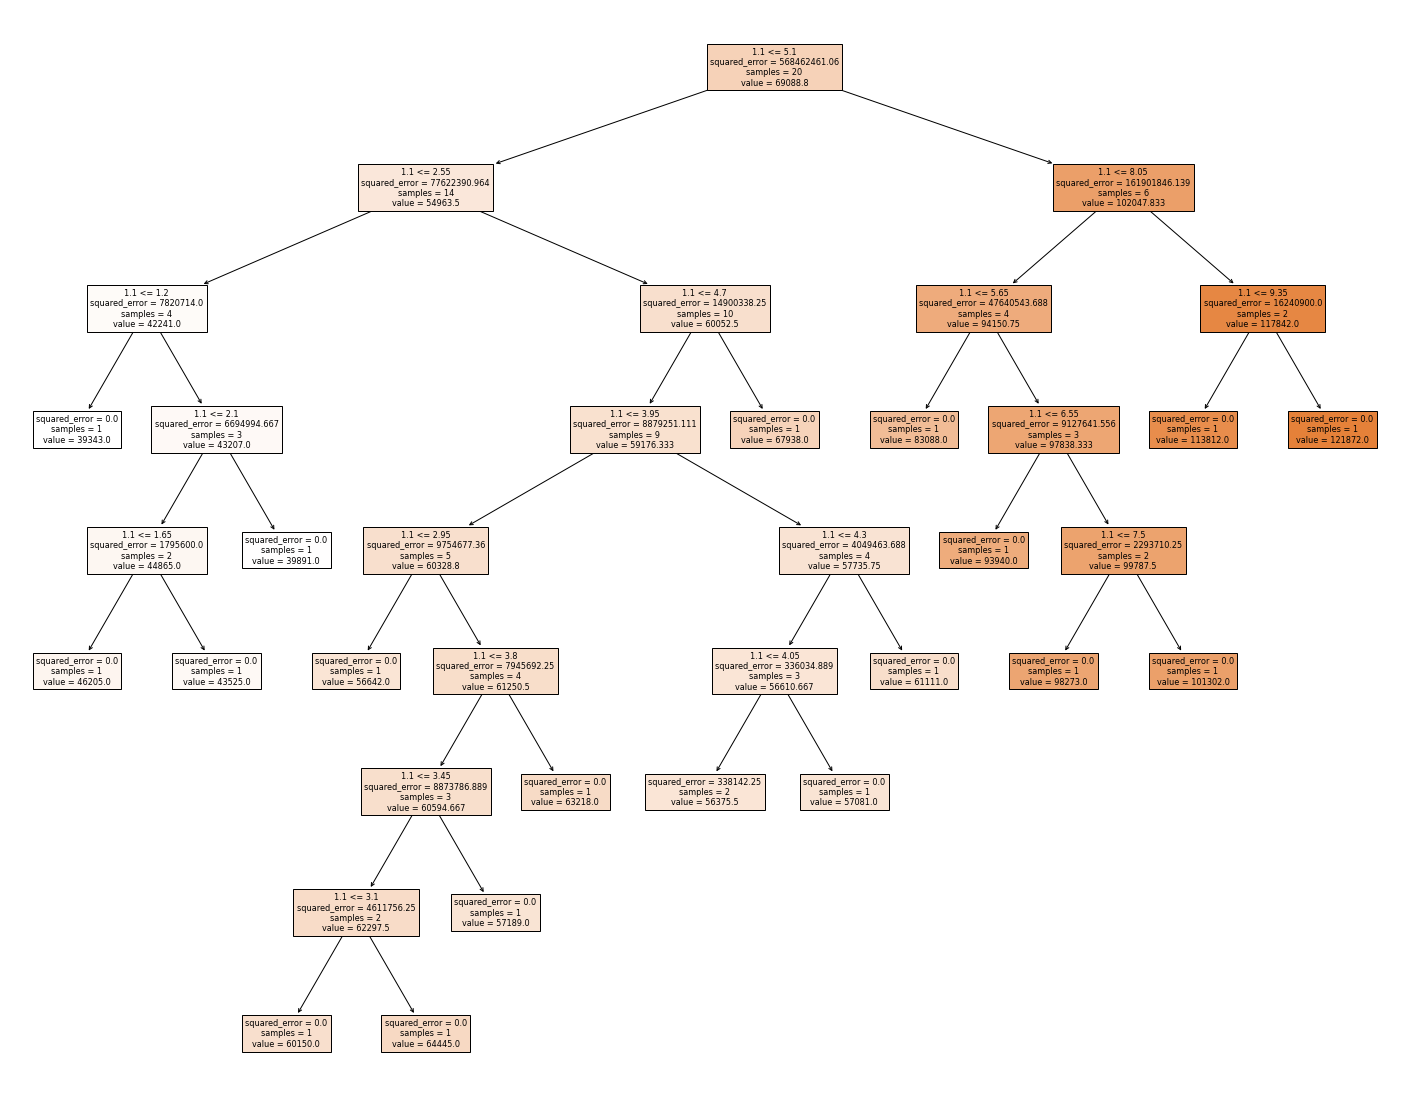

In [70]:
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(DT,feature_names=df['YearsExperience'],filled=True)

In [71]:
fig.savefig(r'C:\Users\Tirupathi\Desktop\sal_pred_project\DT.png')
